In [1]:
import numpy as np
import seaborn as sns
from time import time
import gc

In [2]:
init_state = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
])

In [3]:
class Game:
    def __init__(self, state):
        self.state = state
        self.empty = self.make_empty(state)
        self.first_player = FIRST
        
    def make_empty(self, state):
        emp = []
        for i in range(3):
            for j in range(3):
                if state[i][j] == 0:
                    emp.append(3*i + j)
        
        return emp
    
    def is_lose(self, a):
        opp = 2 - (a-1)
        
        for i in range(3):
            if self.state[i][0] == self.state[i][1] == self.state[i][2] == opp:
                return 1
            elif self.state[0][i] == self.state[1][i] == self.state[2][i] == opp:
                return 1
        if self.state[0][0] == self.state[1][1] == self.state[2][2] == opp:
            return 1
        return 0
    
    def is_win(self, a):       
        for i in range(3):
            if self.state[i][0] == self.state[i][1] == self.state[i][2] == a:
                return 1
            elif self.state[0][i] == self.state[1][i] == self.state[2][i] == a:
                return 1
        if self.state[0][0] == self.state[1][1] == self.state[2][2] == a:
            return 1
        if self.state[0][2] == self.state[1][1] == self.state[2][0] == a:
            return 1
        return 0
    
    def is_draw(self, a):
        if self.is_win(a):
            return 0
        if np.all(self.state):
            return 1
        else:
            return 0
        
    def is_done(self):
        if self.is_win(1) or self.is_win(2) or self.is_draw(a):
            return 1
        else:
            return 0
        
        
    def update(self, target):
        state = self.state.copy()
        x, y = target//3, target%3
        a = self.next_opp()
        state[x][y] = a
        return Game(state)
    
    
    def next_opp(self):
        a = b = 0
        for i in range(len(self.state)):
            for j in range(len(self.state)):
                if self.state[i][j] == self.first_player:
                    a += 1
                elif self.state[i][j] != 0:
                    b += 1
                    
        if a == b:
            return self.first_player
        else:
            return 2 + min(0, 1-self.first_player)

In [4]:
class Random:
    def __init__(self, status):
        self.status = status

    def action(self, game):
        return np.random.choice(game.empty)

In [5]:
class MinMax:
    def __init__(self, status):
        self.status = status

    def value(self, game, alpha, beta):
#         print(game.state)
        if game.is_lose(self.status):
            return -1
        
        if game.is_draw(self.status):
            return 0
        
        if game.is_win(self.status):
#             print(game.state)
            return 1
        
        
        best_score = -float('inf')
        score = 0
        for a in game.empty:
            score += self.value(game.update(a), beta, alpha)
            
            if score > alpha:
                alpha = score
#                 print(score)

            if alpha >= beta:
                return alpha
                
        return alpha
        
    def action(self, game):
#         if FIRST == self.status and len(game.empty) == 9:
#             return 4
        
        alpha = -float('inf')
        
        for a in game.empty:
            score = self.value(game.update(a), -float('inf'), alpha)
            if score > alpha:
                best_action = a
                alpha = score
#                 print(best_action)
        return best_action

    

In [6]:
def play(game, m1, m2):
    global score
    while 1:
        a1 = m1.action(game)
        game = game.update(a1)
        if game.is_win(m1.status):
            score[m1.status-1] += 1
#             print(game.state)
            return 
        elif game.is_draw(m1.status):
            score[2] += 1
#             print(game.state)
            return 

        a2 = m2.action(game)
        game = game.update(a2)
        if game.is_win(m2.status):
            score[m2.status-1] += 1
#             print(game.state)
            return 
        elif game.is_draw(m2.status):
            score[2] += 1
#             print(game.state)
            return 
        

In [7]:
FIRST = 1
game = Game(init_state)
m1 = Random(1)
m2 = MinMax(2)

In [8]:
%%time
score = [0, 0, 0]
for _ in range(1000):
#     print(_)
    play(game, m1, m2)
    
gc.collect()

FIRST = 2
game = Game(init_state)
score1 = score.copy()
for _ in range(1000):
#     print(_)
    play(game, m2, m1)

Wall time: 11.5 s


In [9]:
score

[320, 1491, 189]

In [10]:
score1

[190, 671, 139]

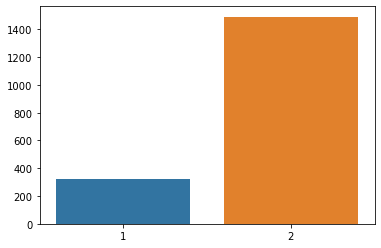

In [11]:
sns.barplot(x = [1, 2], y = score[:2])

In [12]:
# v1: 75vs120
# v2: 57vs134
# v3: 61vs128
# v4: 52vs131 // 33vs56
# v5: 47vs144 // 29vs65
# v6: 45vs150 // 32vs63
# v7 221vs1183 // 113vs402
# v8 310vs1210 // 78vs492
# v9 331vs1444 // 194vs645